In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import folium.plugins as plugins
import warnings
import datetime
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

print("Init completed")

# Read Data
data = pd.read_csv('Los_Angeles_Crime.csv')
print(str(data.shape[0]) + " No of records loaded")

#Print data info
print(data.info())

#Round of data to 2 digits
data.describe().T.round(2)


Init completed
407199 No of records loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407199 entries, 0 to 407198
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RECORD_NUMBER       407199 non-null  int64  
 1   DATE_REPORTED       407199 non-null  object 
 2   DATE_OCCURRENCE     407199 non-null  object 
 3   TIME_OF_OCCURRENCE  407199 non-null  int64  
 4   AREA                407199 non-null  int64  
 5   AREA_NAME           407199 non-null  object 
 6   RPT_DIST_NO         407199 non-null  int64  
 7   PART_1_2            407199 non-null  int64  
 8   CRIME_CODE          407199 non-null  int64  
 9   CRIME_CD_DESC       407199 non-null  object 
 10  MOCODES             350928 non-null  object 
 11  VICTIM_AGE          407199 non-null  int64  
 12  VICTIM_SEX          353458 non-null  object 
 13  VICTIM_DESCENT      353453 non-null  object 
 14  PREMIS_CD           407194 non-null  floa

,count,mean,std,min,25%,50%,75%,max
RECORD_NUMBER,407199.0,2.065638e+08,5383830.15,817.00,2.012101e+08,2.101217e+08,2.112125e+08,2.221167e+08
TIME_OF_OCCURRENCE,407199.0,1.349040e+03,650.63,1.00,9.150000e+02,1.430000e+03,1.900000e+03,2.359000e+03
AREA,407199.0,1.080000e+01,6.05,1.00,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
RPT_DIST_NO,407199.0,1.126040e+03,605.08,101.00,6.310000e+02,1.148000e+03,1.621000e+03,2.199000e+03
PART_1_2,407199.0,1.410000e+00,0.49,1.00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CRIME_CODE,407199.0,5.068500e+02,209.85,110.00,3.300000e+02,4.800000e+02,6.260000e+02,9.560000e+02
VICTIM_AGE,407199.0,3.006000e+01,21.72,-1.00,1.200000e+01,3.100000e+01,4.500000e+01,1.200000e+02
PREMIS_CD,407194.0,2.978700e+02,214.57,101.00,1.010000e+02,2.030000e+02,5.010000e+02,9.710000e+02
WEAPON_USED_CODE,146379.0,3.620600e+02,123.38,101.00,3.080000e+02,4.000000e+02,4.000000e+02,5.160000e+02
CRIME_CODE_1,407195.0,5.065800e+02,209.64,110.00,3.300000e+02,4.800000e+02,6.260000e+02,9.560000e+02


In [77]:
#Check missing values
data.isna().sum()

RECORD_NUMBER              0
DATE_REPORTED              0
DATE_OCCURRENCE            0
TIME_OF_OCCURRENCE         0
AREA                       0
AREA_NAME                  0
RPT_DIST_NO                0
PART_1_2                   0
CRIME_CODE                 0
CRIME_CD_DESC              0
MOCODES                56271
VICTIM_AGE                 0
VICTIM_SEX             53741
VICTIM_DESCENT         53746
PREMIS_CD                  5
PREMIS_DESC              160
WEAPON_USED_CODE      260820
WEAPON_DESC           260820
STATUS                     0
STATUS_DESC                0
CRIME_CODE_1               4
CRIME_CODE_2          374842
CRIME_CODE_3          406090
CRIME_CODE_4          407164
LOCATION                   0
CROSS_STREET          336150
LAT                        0
LON                        0
dtype: int64

In [78]:
#Remove missing value
threshold = 0.6 * len(data)
data_filtered = data.dropna(thresh=threshold, axis=1)

#Check missing value
data_filtered.isna().sum()
data_filtered.dropna(inplace = True)
data_filtered.shape

#Count Duplicates
data_filtered.duplicated().value_counts()

#Drop Duplicates
data_filtered_NoDuplicates = data_filtered.drop_duplicates()
data_filtered_NoDuplicates.shape

(350684, 22)

In [79]:
def remove_outliers_from_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=np.number).columns
    for column in numeric_columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        #Remove rows with outliers
        dataframe = dataframe[~outliers]
        
    return dataframe

finalDF = remove_outliers_from_numeric_columns(data_filtered_NoDuplicates)
finalDF.shape

finalDF["DATE_OCCURRENCE"] = pd.to_datetime(finalDF["DATE_OCCURRENCE"])


In [80]:
finalDF.isna().sum()

RECORD_NUMBER         0
DATE_REPORTED         0
DATE_OCCURRENCE       0
TIME_OF_OCCURRENCE    0
AREA                  0
AREA_NAME             0
RPT_DIST_NO           0
PART_1_2              0
CRIME_CODE            0
CRIME_CD_DESC         0
MOCODES               0
VICTIM_AGE            0
VICTIM_SEX            0
VICTIM_DESCENT        0
PREMIS_CD             0
PREMIS_DESC           0
STATUS                0
STATUS_DESC           0
CRIME_CODE_1          0
LOCATION              0
LAT                   0
LON                   0
dtype: int64

<AxesSubplot: >

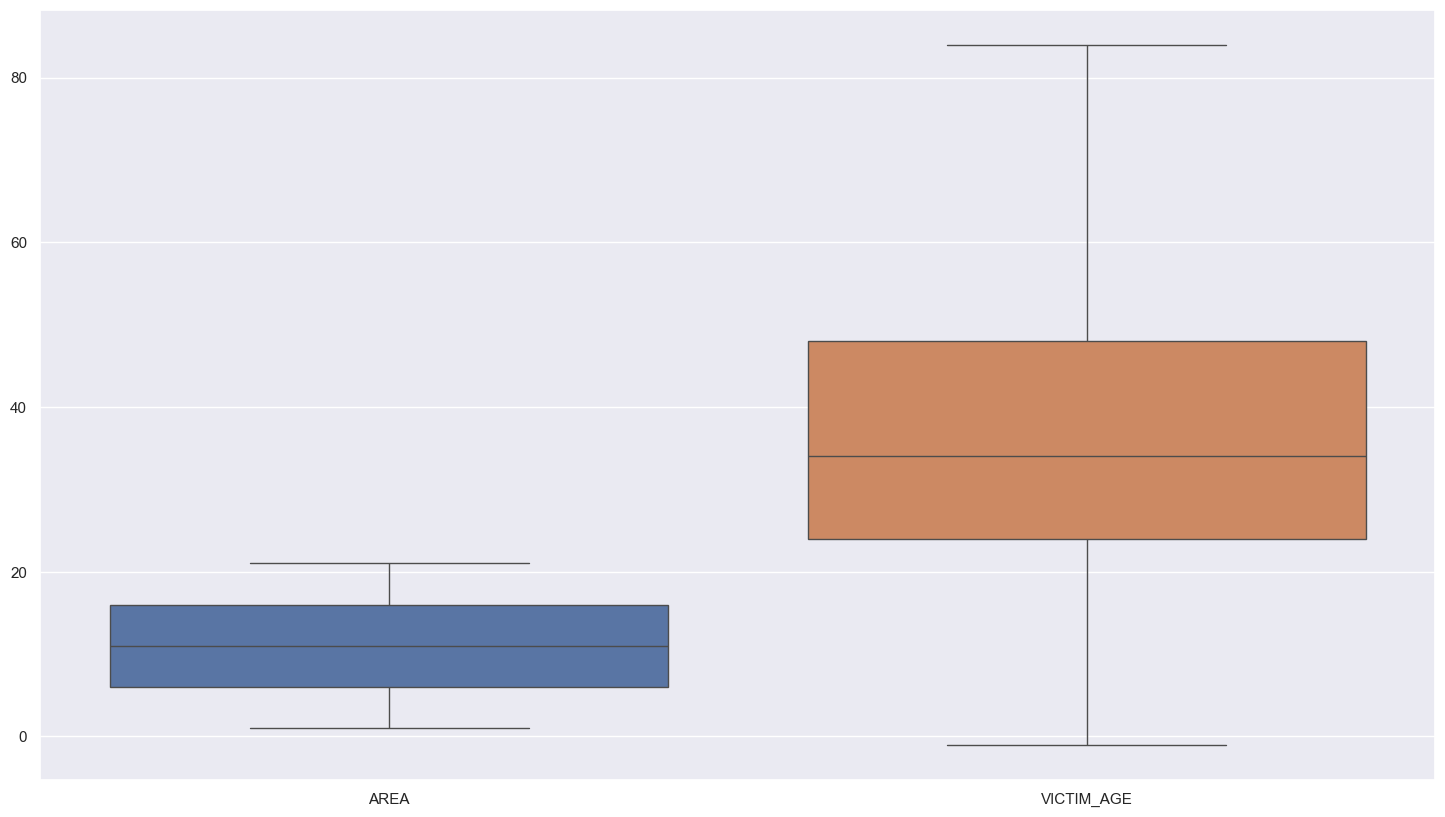

In [81]:
#Test box plot
checkBoxPlot = finalDF[['AREA', 'VICTIM_AGE']]
                        
sns.set(rc={'figure.figsize':(18,10)})
sns.boxplot(data=checkBoxPlot)

In [82]:
#Data Analysis
#1. Crime distribution by gender
data_gender = finalDF
data_gender["YEAR_OCCURRENCE"] = pd.DatetimeIndex(data_gender["DATE_OCCURRENCE"]).year
data_gender = pd.DataFrame(data_gender.groupby(["YEAR_OCCURRENCE","VICTIM_SEX"])["VICTIM_SEX"].count())
data_gender.rename(columns={'VICTIM_SEX': 'Count'}, inplace=True)
data_gender.reset_index(inplace=True)

data_gender.head()
#Remove invalid data for gender
data_gender=data_gender[(data_gender["VICTIM_SEX"] != "H")]
data_gender.head()

fig = px.bar(data_gender, x="YEAR_OCCURRENCE", y="Count", color="VICTIM_SEX", title="Crimes per gender")
fig.show()


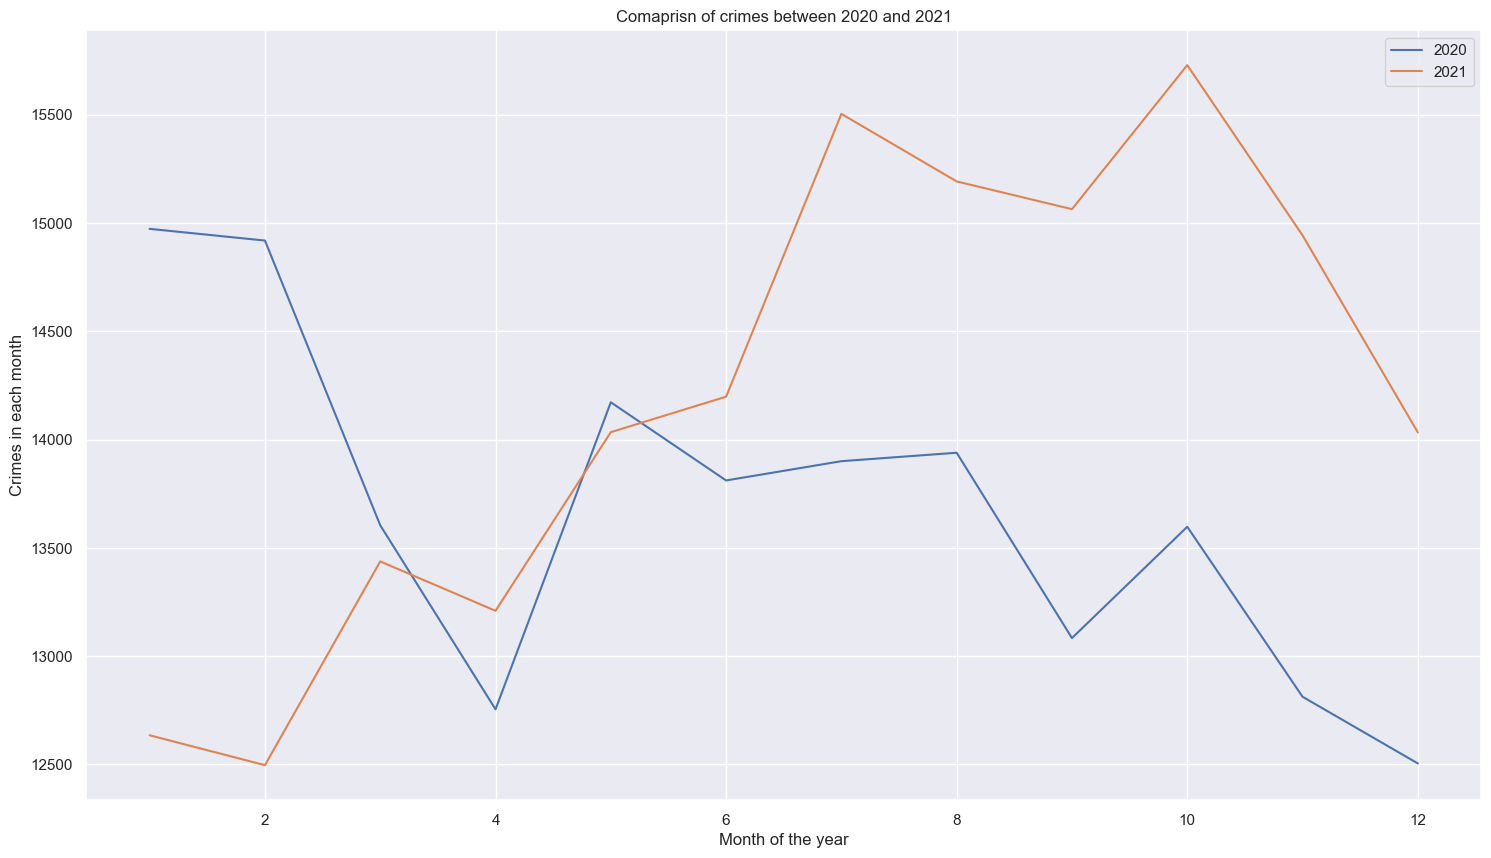

In [83]:
#Comparing Crime occured in 2020 and 2021
data_year_2020 = finalDF[(finalDF["DATE_OCCURRENCE"] > "2020-01-01") & (finalDF["DATE_OCCURRENCE"] < "2020-12-31")]
data_year_2020["MONTH_OCCURRENCE"] = pd.DatetimeIndex(data_year_2020["DATE_OCCURRENCE"]).month
data_year_2020 = pd.DataFrame(data_year_2020.groupby(["MONTH_OCCURRENCE"])["MONTH_OCCURRENCE"].count())
data_year_2020.rename(columns={'MONTH_OCCURRENCE': 'Count'}, inplace=True)
data_year_2020.reset_index(inplace=True)

data_year_2020.head()

data_year_2021 = finalDF[(finalDF["DATE_OCCURRENCE"] > "2021-01-01") & (finalDF["DATE_OCCURRENCE"] < "2021-12-31")]
data_year_2021["MONTH_OCCURRENCE"] = pd.DatetimeIndex(data_year_2021["DATE_OCCURRENCE"]).month
data_year_2021 = pd.DataFrame(data_year_2021.groupby(["MONTH_OCCURRENCE"])["MONTH_OCCURRENCE"].count())
data_year_2021.rename(columns={'MONTH_OCCURRENCE': 'Count'}, inplace=True)
data_year_2021.reset_index(inplace=True)


plt.plot(data_year_2020["MONTH_OCCURRENCE"], data_year_2020["Count"], label = "2020") 
plt.plot(data_year_2021["MONTH_OCCURRENCE"], data_year_2021["Count"], label = "2021") 
plt.legend()
plt.title("Comaprisn of crimes between 2020 and 2021")
plt.xlabel("Month of the year")
plt.ylabel("Crimes in each month")
plt.show()


In [84]:
#Data Analysis
#Over all Crime comparisn by year
data_pie = finalDF
data_pie["YEAR_OCCURRENCE"] = pd.DatetimeIndex(data_pie["DATE_OCCURRENCE"]).year
data_pie = pd.DataFrame(data_pie.groupby(["YEAR_OCCURRENCE"])["YEAR_OCCURRENCE"].count())
data_pie.rename(columns={'YEAR_OCCURRENCE': 'Count'}, inplace=True)
data_pie.reset_index(inplace=True)
data_pie.head()
#Pie chart to compare overall occurances by year
fig = px.pie(data_pie, values='Count', names='YEAR_OCCURRENCE', title='Overall crime comparisn')
fig.show()


In [85]:
#Crime in each area
data_area = finalDF
data_area = pd.DataFrame(data_area.groupby(["AREA","AREA_NAME"])["AREA"].count())
data_area.rename(columns={'AREA': 'Count'}, inplace=True)
data_area.reset_index(inplace=True)
data_area.head()
#Sort data before display
data_area.sort_values(by="Count",inplace=True, ascending=False)
fig = px.bar(data_area, x="AREA_NAME", y="Count", color="AREA_NAME", title="Crimes per area")
fig.show()

In [86]:
#Crime analtsis by type of crime
data_crime = finalDF
data_crime = pd.DataFrame(data_crime.groupby(["CRIME_CODE","CRIME_CD_DESC"])["CRIME_CODE"].count())
data_crime.rename(columns={'CRIME_CODE': 'Count'}, inplace=True)
data_crime.reset_index(inplace=True)
data_crime.head()
data_crime.sort_values(by="Count",inplace=True, ascending=False)
fig = px.bar(data_crime, x="CRIME_CD_DESC", y="Count", color="CRIME_CD_DESC", title="Crimes per crime type")
fig.show()

In [99]:
#Deep analysis on BATTERY - SIMPLE ASSAULT(Code - 624)
data_battery = finalDF[(finalDF["CRIME_CODE"] == 624)]
data_battery = pd.DataFrame(data_battery.groupby(["AREA","AREA_NAME"])["AREA"].count())
data_battery.rename(columns={'AREA': 'Count'}, inplace=True)
data_battery.reset_index(inplace=True)
data_battery.shape
data_battery.sort_values(by="Count",inplace=True, ascending=False)
fig = px.bar(data_battery, x="AREA_NAME", y="Count", color="AREA_NAME", title="BATTERY Crimes per area")
fig.show()